In [1]:
import pandas as pd

In [ ]:
df= pd.read_csv ("umsatzdaten_gekuerzt.csv")
df.head()

In [3]:
#Datum umwandeln
df['Datum'] = pd.to_datetime(df['Datum'])

#Wochentag bestimmen
df['Wochentag'] = df['Datum'].dt.day_name()

In [ ]:
#average sales per weekday
avg_per_weekday = df.groupby('Wochentag')['Umsatz'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_per_weekday = avg_per_weekday.reindex(weekday_order)
print(avg_per_weekday)

In [ ]:
#Balkendiagramm erstellen (bar chart)
import matplotlib.pyplot as plt
avg_per_weekday.plot(kind='bar')
plt.xlabel('Wochentag')
plt.ylabel('average sales')
plt.title('average sales per weekday')
plt.show()

In [ ]:
#confidence intervals berechnen

sem_sales =df.groupby('Wochentag')['Umsatz'].sem().reindex (weekday_order) #standard error mean (sem)
print(sem_sales)

In [ ]:
#confidence intervals zum Balkendiagramm hinzufuegen
avg_per_weekday.plot(kind='bar', yerr=sem_sales) #yerr = Standardfehler
plt.xlabel('Wochentag')
plt.ylabel('average sales')
plt.title('average sales per weekday with confidence intervals')
plt.show()

In [23]:
import pandas as pd
from functools import reduce

# CSV-Dateien einlesen
umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")
kiwo = pd.read_csv("kiwo.csv")
wetter = pd.read_csv("wetter.csv")

# für später: Datumsspalte in echtes Datumsformat umwandeln
for df in [umsatz, kiwo, wetter]:
    df["Datum"] = pd.to_datetime(df["Datum"])

# Liste aller DataFrames
dfs = [umsatz, kiwo, wetter]

# Mit reduce alle DataFrames nacheinander über 'Datum' mergen
merged_df = reduce(lambda left, right: pd.merge(left, right, on="Datum", how="left"), dfs)

# Kontrolle
print (merged_df.head())

#Kontrolle nach fehlenden Werten
print("Zeilen in umsatz:", len(umsatz))
print("Zeilen im merged_df:", len(merged_df))

#Statistische Übersicht des gemergten DataFrames
merged_df.describe().T

#speichern
merged_df.to_csv("merged_data.csv", index=False)

        id      Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  \
0  1307011 2013-07-01            1  148.828353          NaN         6.0   
1  1307021 2013-07-02            1  159.793757          NaN         3.0   
2  1307031 2013-07-03            1  111.885594          NaN         7.0   
3  1307041 2013-07-04            1  168.864941          NaN         7.0   
4  1307051 2013-07-05            1  171.280754          NaN         5.0   

   Temperatur  Windgeschwindigkeit  Wettercode  
0     17.8375                 15.0        20.0  
1     17.3125                 10.0         NaN  
2     21.0750                  6.0        61.0  
3     18.8500                  7.0        20.0  
4     19.9750                 12.0         NaN  
Zeilen in umsatz: 9334
Zeilen im merged_df: 9334


/tmp/ipykernel_29630/166321304.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby("Monat")["Warengruppe"]


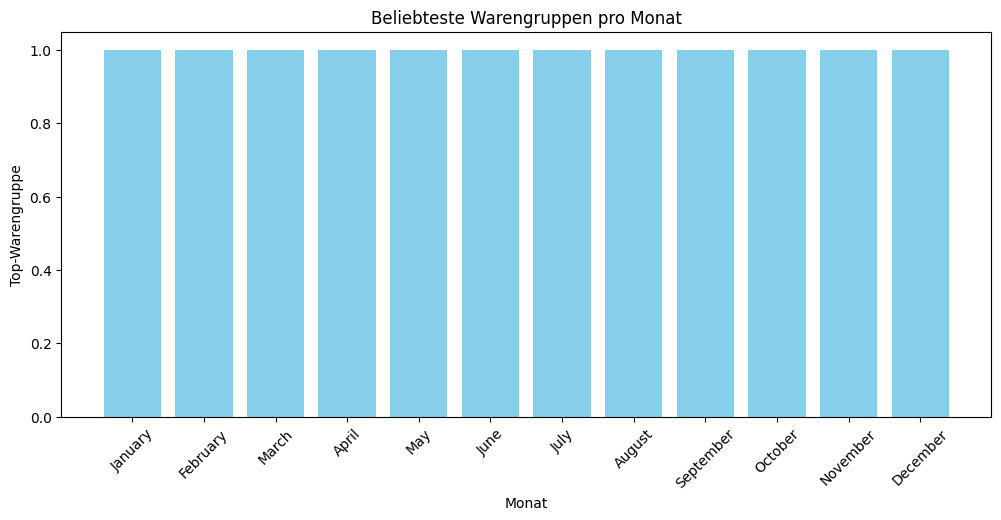

/tmp/ipykernel_29630/166321304.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(["Monat", "Warengruppe"])["Umsatz"]
/tmp/ipykernel_29630/166321304.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  umsatz_monat_wg.groupby("Monat")
/tmp/ipykernel_29630/166321304.py:62: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence thi

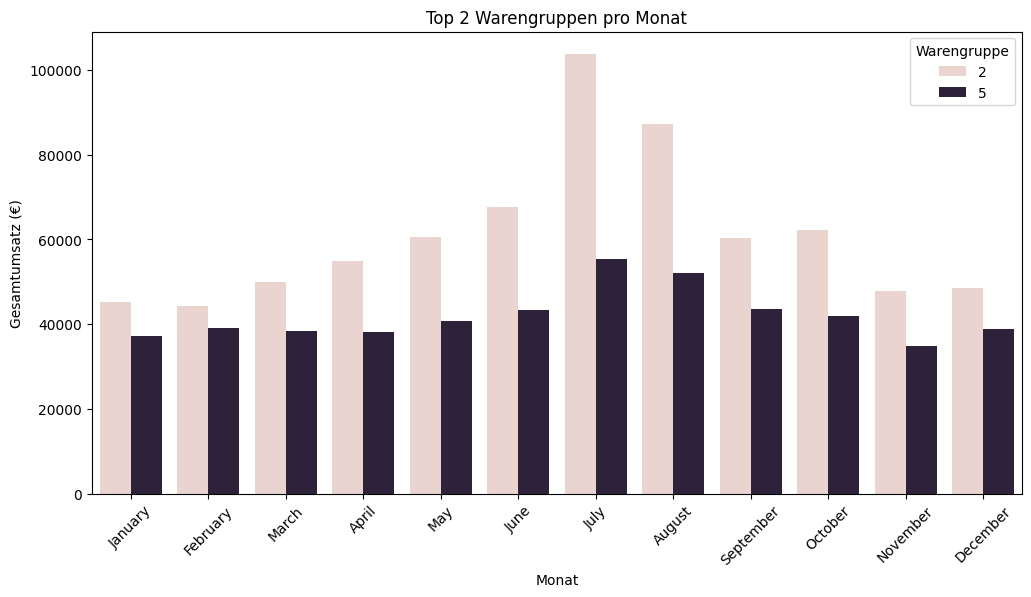

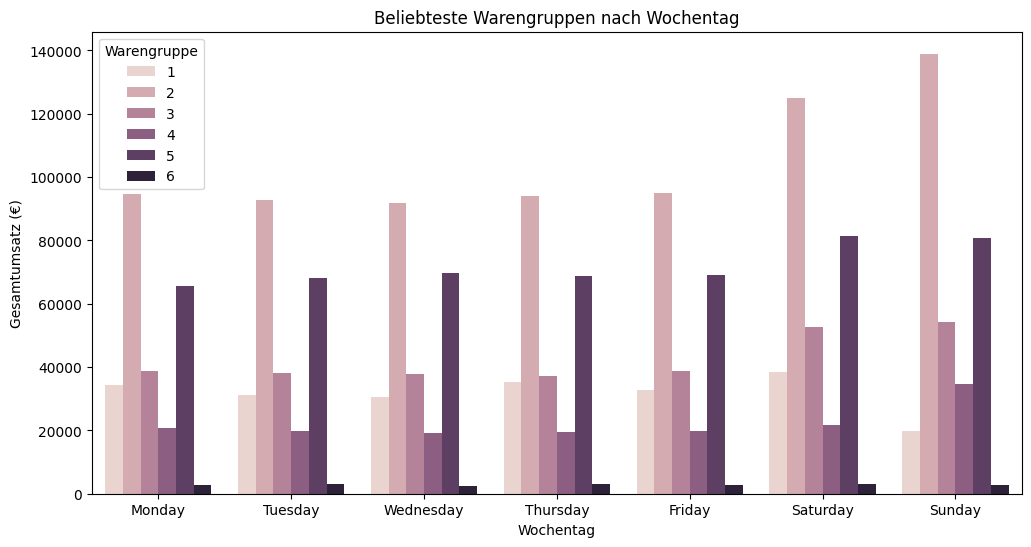

In [ ]:
#Visualisierung für Warengruppen

import pandas as pd
merged_df = pd.read_csv("merged_data.csv")

# Datum in datetime umwandeln
merged_df["Datum"] = pd.to_datetime(merged_df["Datum"])

#Monatlich
import pandas as pd
import matplotlib.pyplot as plt

# Datum in datetime umwandeln
merged_df["Datum"] = pd.to_datetime(merged_df["Datum"])

# englische Monatsnamen extrahieren
merged_df["Monat"] = merged_df["Datum"].dt.month_name()

#ordnen
monate_sortiert = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

#Top 1 für Monat:
merged_df["Monat"] = pd.Categorical(
    merged_df["Monat"],
    categories=monate_sortiert,
    ordered=True
)

#beliebteste Warengruppe/Monat
monats_top = (
    merged_df.groupby("Monat")["Warengruppe"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

#sortieren
monats_top = monats_top.sort_values("Monat")

#Visualisierung
plt.figure(figsize=(12,5))
plt.bar(monats_top["Monat"], monats_top["Warengruppe"], color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Monat")
plt.ylabel("Top-Warengruppe")
plt.title("Beliebteste Warengruppen pro Monat")
plt.show()


#Top 2 für Monat:
# Monatsspalte bereits als Categorical gesetzt wg. Reihenfolge
umsatz_monat_wg = (
    merged_df.groupby(["Monat", "Warengruppe"])["Umsatz"]
    .sum()
    .reset_index()
)
# Für jeden Monat die beiden Warengruppen mit dem höchsten Umsatz
top2_monat = (
    umsatz_monat_wg.groupby("Monat")
    .apply(lambda x: x.nlargest(2, "Umsatz"))
    .reset_index(drop=True)
)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=top2_monat,
    x="Monat",
    y="Umsatz",
    hue="Warengruppe"
)
plt.xticks(rotation=45)
plt.xlabel("Monat")
plt.ylabel("Gesamtumsatz (€)")
plt.title("Top 2 Warengruppen pro Monat")
plt.legend(title="Warengruppe")
plt.show()



#Wochentag
merged_df["Datum"] = pd.to_datetime(merged_df["Datum"])
merged_df["Wochentag"] = merged_df["Datum"].dt.day_name()  # Englisch

beliebteste_pro_tag = (
    merged_df.groupby(["Wochentag", "Warengruppe"])["Umsatz"]
    .sum()
    .reset_index()
)

wochentage_sortiert = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
beliebteste_pro_tag["Wochentag"] = pd.Categorical(
    beliebteste_pro_tag["Wochentag"], categories=wochentage_sortiert, ordered=True
)

#Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=beliebteste_pro_tag,
    x="Wochentag",
    y="Umsatz",
    hue="Warengruppe"
)
plt.title("Beliebteste Warengruppen nach Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Gesamtumsatz (€)")
plt.show()

                      id  Warengruppe      Umsatz  KielerWoche  Bewoelkung  \
Datum                                                                        
2013-07-07  1.307043e+06     3.000000  267.679081          NaN    4.000000   
2013-07-14  1.307113e+06     2.970588  297.170405          NaN    1.176471   
2013-07-21  1.307183e+06     2.970588  312.910737          NaN    2.205882   
2013-07-28  1.307251e+06     2.939394  340.573733          NaN    1.818182   
2013-08-04  1.307756e+06     2.906250  365.426500          NaN    3.406250   
...                  ...          ...         ...          ...         ...   
2018-07-08  1.807053e+06     3.000000  246.824991          NaN    1.714286   
2018-07-15  1.807123e+06     3.000000  282.159950          NaN    3.571429   
2018-07-22  1.807193e+06     3.000000  304.503482          NaN    0.857143   
2018-07-29  1.807263e+06     3.000000  309.482211          NaN    1.000000   
2018-08-05  1.807308e+06     3.000000  282.393264          NaN  

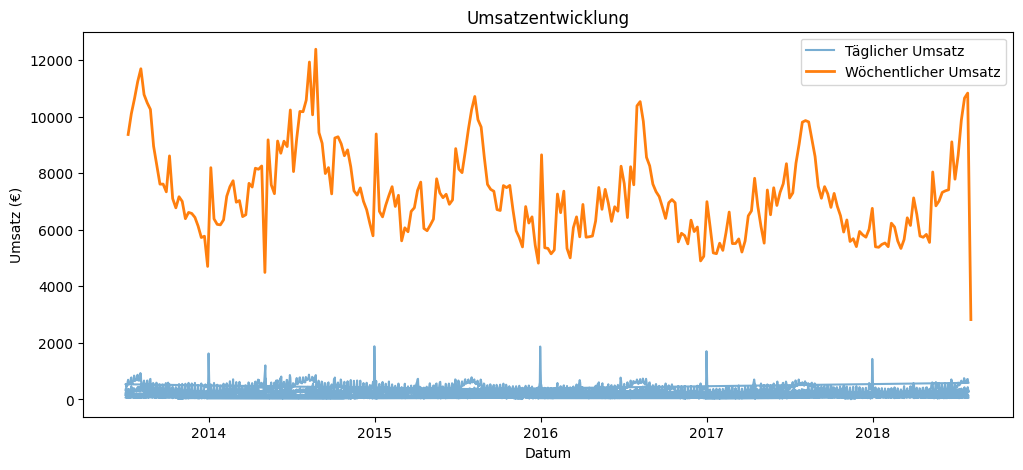

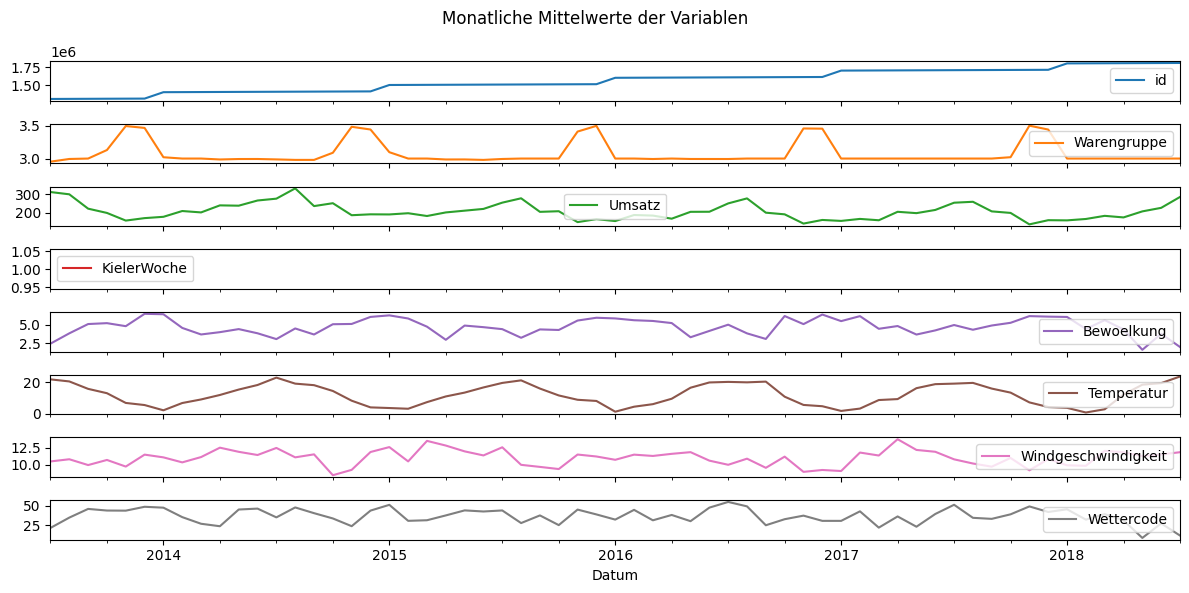

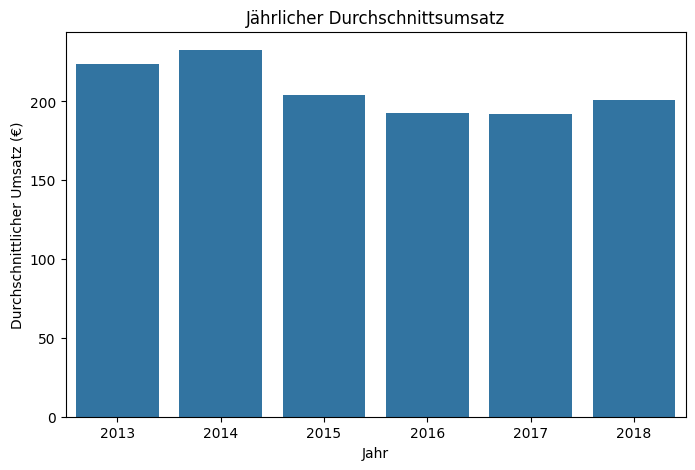

In [ ]:
#andere zeitliche Analysen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei einlesen
merged_df = pd.read_csv("merged_data.csv")

# Datumsspalte als Datetime-Format
merged_df["Datum"] = pd.to_datetime(merged_df["Datum"])

#Datum als Index
merged_df = merged_df.set_index("Datum")

#monatliche Statistiken
monthly.describe().T

#jaehrliche Statistiken
yearly.describe().T

# Woechentliche Mittelwerte
weekly = merged_df.resample("W").mean()
print(weekly)

# Monatliche Mittelwerte
monthly = merged_df.resample("ME").mean()
print(monthly)

# Jaehrliche Mittelwerte
yearly = merged_df.resample("YE").mean()
print(yearly)

#Summen
weekly_sum = merged_df.resample("W")["Umsatz"].sum()
monthly_sum = merged_df.resample("ME")["Umsatz"].sum()
yearly_sum = merged_df.resample("YE")["Umsatz"].sum()
print("Wöchentliche Umsätze:\n", weekly_sum)
print("Monatliche Umsätze:\n", monthly_sum)
print("Jährliche Umsätze:\n", yearly_sum)

#Visualisierung allgemein
plt.figure(figsize=(12,5))
plt.plot(merged_df.index, merged_df["Umsatz"], label="Täglicher Umsatz", alpha=0.6)
plt.plot(weekly_sum.index, weekly_sum, label="Wöchentlicher Umsatz", linewidth=2)
plt.title("Umsatzentwicklung")
plt.xlabel("Datum")
plt.ylabel("Umsatz (€)")
plt.legend()
plt.show()

#monatliche Umsaetze visualisieren
monthly.plot(figsize=(12,6), subplots=True, title="Monatliche Mittelwerte der Variablen")
plt.tight_layout()
plt.show()

#jährliche Umsaetze visualisieren
plt.figure(figsize=(8,5))
sns.barplot(x=yearly.index.year, y=yearly["Umsatz"])
plt.title("Jährlicher Durchschnittsumsatz")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittlicher Umsatz (€)")
plt.show()

